In [22]:
import numpy as np
from collections import defaultdict
import networkx as nx
import time as my_time
import collections 

In [23]:
# Initialize fake data
# My_BFS
articles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

categories = {"alpha": [1, 2, 3, 4], "beta":[2, 5], "gamma":[4, 6], "delta":[7, 8, 9, 10]}

links = {1:[2, 3,4], 2:[6], 3:[8], 4:[], 5:[10], 6:[7], 7:[], 8:[], 9:[4], 10:[]}

In [27]:
# Charlie
articles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

categories = {"alpha": [1, 2, 3, 4], "beta":[2, 5], "gamma":[4, 6], "delta":[7, 8, 9, 10]}

links = {1:[2, 3], 2:[5], 3:[7], 4:[1], 5:[], 6:[4], 7:[2, 6, 8, 9, 10], 8:[], 9:[], 10:[]}

In [28]:
# Intialize directed graph
graph = nx.DiGraph()
graph.add_nodes_from(list(links.keys()))
# Add edges
edges_n = 0
for k in links.keys():
    edges_n += len(links[k])
    for j in links[k]:
        graph.add_edge(k,j)

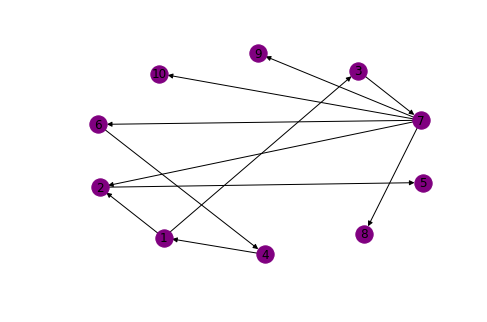

In [29]:
pos = nx.spring_layout(graph, k = 100, iterations = 500, scale = 0.1)
nx.draw(graph, with_labels = True, pos = pos, node_color = 'purple')

In [1]:
# Initialize real data
articles = 'wiki-topcats-page-names.txt'

hyperlink = 'wiki-topcats-reduced.txt'

categories_file = 'wiki-topcats-categories.txt'

In [2]:
# create dictionary with article's id as key and article's name as value
idx_name = {}
with open(articles) as f:
    for line in f:
        (key, val) = line.split(' ', 1)
        idx_name[int(key)] = val.strip()     

In [3]:
articles = list(idx_name.keys())

In [8]:
# create dictionary with article's id as key and list of article's hyperlinks as value
links = defaultdict(list)
with open(hyperlink) as f:
    for line in f:
        (key, val) = line.split('\t')
        links[int(key)].append(int(val.strip()))

In [13]:
# create dictionary with article's category as key and list of article's idx as value
categories = {}
count = 0
with open(categories_file) as f:
    for line in f:
        count += 1
        (key, val) = line.split(';')
        if val.strip() != '':
            list_art = (val.strip()).split(' ')
            if len(list_art) > 3500:
                categories[key.replace('Category:','')] = list(map(int,list_art))

In [30]:
for category in categories:        
        print(category)

alpha
beta
gamma
delta


In [15]:
len(categories["English_cricketers"])

3813

In [52]:
category_files=list()
for category in categories:
    file=open("/home/jagg/Data/HW5/files/" + category, "w")
    category_files.append(file)

In [53]:
my_start = my_time.time()
inf=float("inf")

       
for source in categories["alpha"]:
    
    print(source)
    
    distances=dict()
    
    for article in articles:
        if article==source:
            distances[article]=0
        else:
            distances[article]=inf
        
    visited=set()
    inf=float("inf")
    current_level=set()
    next_level=set()
    current_level.add(source)
    
    for link in links[source]:
        next_level.add(link)
        
    level=0
    
    while next_level!=set():
    
        next_level=set()
    
        for node in current_level:
            visited.add(node)
            if node != source:
                distances[node] = level
            for link in links[node]:
                if link not in visited:
                    next_level.add(link)
        level+=1
        current_level=next_level
        
    for node in distances:
        for category in categories:
            if node in categories[category]:
                index=list(categories.keys()).index(category)
                category_files[index].write(str(distances[node]))
                category_files[index].write("\n")
                    
for file in category_files:
    file.close()
        
my_end = my_time.time()

1
2
3
4


In [64]:
category_dict=dict()

In [66]:
for category in categories:
    file=open("/home/jagg/Data/HW5/files/" + category, "r")
    content=file.read()
    content=content.split("\n")
    content.remove("")
    file.close()
    content=list(map(float, content))
    median=np.median(content)
    category_dict[category]=median
print(category_dict)

{'alpha': 2.0, 'beta': 2.0, 'gamma': 3.5, 'delta': 3.0}


In [68]:
my_rank = collections.namedtuple('Category', ["name", "score"])

In [69]:
category_list=list()
for category in category_dict:
    category_list.append(my_rank(name=category, score=category_dict[category]))

print(category_list)

[Category(name='alpha', score=2.0), Category(name='beta', score=2.0), Category(name='gamma', score=3.5), Category(name='delta', score=3.0)]


In [70]:
# bubble sorting
for i in range(len(category_list)-1):
    for idx in range(len(category_list)-1):
        if category_list[idx].score > category_list[idx+1].score:
            temp=category_list[idx]
            category_list[idx] = category_list[idx+1]
            category_list[idx+1]=temp
print(category_list)

[Category(name='alpha', score=2.0), Category(name='beta', score=2.0), Category(name='delta', score=3.0), Category(name='gamma', score=3.5)]
